In [2]:
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline
%run train_toycar.py

FILEHOME = os.path.abspath(os.path.curdir)
datapath = FILEHOME + '/data/data_output_50Hz_tensegrity.txt'
solverpath = FILEHOME + '/models/superball/tensegrity_solver.prototxt'
structurepath = FILEHOME + '/models/superball/tensegrity_2fc_hdf5.prototxt'
deploypath = FILEHOME + '/models/superball/tensegrity_2fc_deploy.prototxt'
weightspath = FILEHOME + '/models/superball/tensegrity_2fc_iter_20000.caffemodel'

model = Model(datapath, 'tensegrity')
mlp = Network(model, solverpath, structurepath, deploypath, weightspath)
gp = SGPRegression(model)


done Reading


/home/colin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:
gp.train()

 /home/colin/anaconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning:The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.


In [2]:
mlp.train()

In [33]:
nnpred = mlp.test(mlp.test_data[:1000,:])
nnpred_diff = np.abs(nnpred - mlp.test_labels[:1000,:])


In [21]:
gpdata = gp.test_data[:10000, :]
gplabels = gp.test_labels[:10000, :]
gppred = gp.test(gpdata)[0]

gppred_diff = np.abs(gppred - gplabels)

In [20]:
print gppred_diff

[  0.42822014   0.27707215  48.19526289 ...,   1.49015097  17.27850406
   1.36402556]


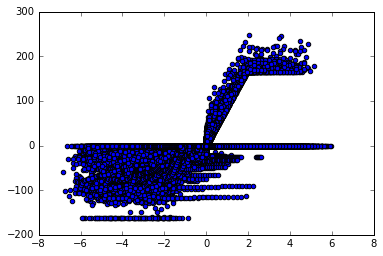

In [118]:
c = 173
n = 149

plt.scatter(gp.controls[:,23] - gp.start_states[:,n-2], gp.end_states[:,n], c="blue")

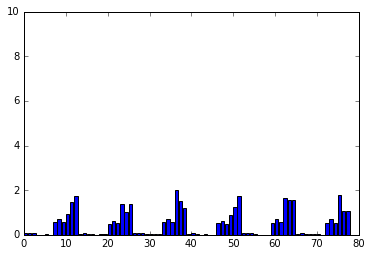

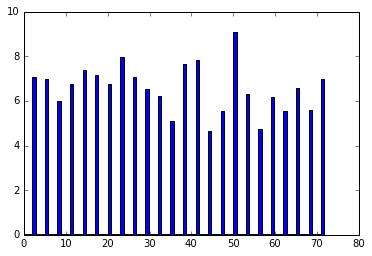

In [34]:
avg_diffs = np.mean(nnpred_diff, axis=0)
plt.bar(np.arange(avg_diffs[0:78].shape[0]),avg_diffs[0:78])
plt.ylim(0,10)
plt.show()
plt.bar(np.arange(avg_diffs[78:150].shape[0]),avg_diffs[78:150])
plt.ylim(0,10)
plt.show()

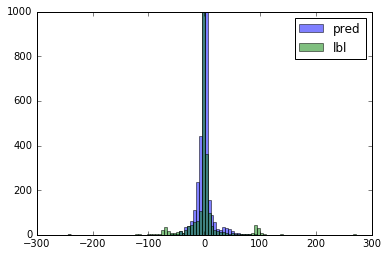

In [19]:
column = 2
bins = np.linspace(np.min(gplabels[:,column]),
                  np.max(gplabels[:,column]), 100)
n, bins_out, plot = plt.hist(gppred[:,column], bins, alpha=0.5, label="pred")
n, bins_out, plot = plt.hist(gplabels[:,column], bins, alpha=0.5, label="lbl")
plt.legend(loc="upper right")
plt.ylim([0, 1000])
plt.show()


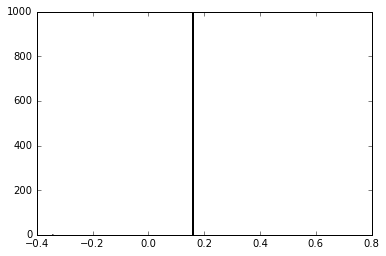

0.155208408833
0.155208408833


In [30]:
data_col = 125
n, bins, plot = plt.hist(nnpred[:,data_col], 200)
# plt.axis([-250, 250, 0, 1000])
plt.show()
print nnpred[:,data_col][0]
print np.average(nnpred[:,data_col])

NameError: name 'gppred_diff' is not defined

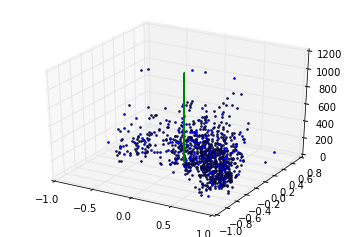

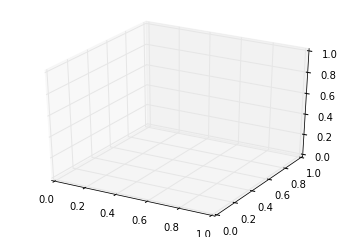

In [16]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(mlp.test_data[:1000,0],mlp.test_data[:1000,1],
       nnpred_diff, 'o', 0, ms=2)

In [13]:
print mlp.test_data[:1000,:]

[[-0.5264625   0.11976171  0.73931968 ..., -0.34567136 -0.39591283  0.02      ]
 [ 0.35264134  0.32674491  0.3235364  ..., -0.85500431  0.39730048  0.02      ]
 [-0.48015088  0.07157898  0.77646923 ...,  0.41529274  0.73020542  0.02      ]
 ..., 
 [ 0.5730871  -0.80792952  0.44242847 ...,  0.73847497  0.2649864   0.02      ]
 [ 0.53303969 -0.51149899 -0.42377979 ...,  0.17599881  0.55306184  0.02      ]
 [ 0.17589879  0.0451206  -0.20527619 ...,  0.63683772  0.66125834  0.02      ]]


In [14]:
print gp.test_data[:1000,:]

[[-0.5264625   0.11976171  0.73931968 ..., -0.34567136 -0.39591283  0.02      ]
 [ 0.35264134  0.32674491  0.3235364  ..., -0.85500431  0.39730048  0.02      ]
 [-0.48015088  0.07157898  0.77646923 ...,  0.41529274  0.73020542  0.02      ]
 ..., 
 [ 0.5730871  -0.80792952  0.44242847 ...,  0.73847497  0.2649864   0.02      ]
 [ 0.53303969 -0.51149899 -0.42377979 ...,  0.17599881  0.55306184  0.02      ]
 [ 0.17589879  0.0451206  -0.20527619 ...,  0.63683772  0.66125834  0.02      ]]


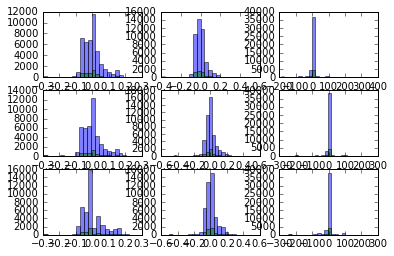

In [14]:
plt.figure(1)
data_col = 140

for i in range(1,10):

    splot_num = "33" + str(i)
    bins = np.linspace(np.min(gp.train_labels[:,data_col + i]), 
                       np.max(gp.train_labels[:,data_col + i]), 25)
    
    plt.subplot(splot_num)
    plt.hist(gp.train_labels[:,data_col + i], bins, alpha=0.5)
    plt.hist(gp.test_labels[:,data_col + i], bins, alpha=0.5)
    plt.yscale('linear')

plt.show()

In [4]:
gp.train_data.shape[1]/3

58